# Evaluation Harness Demonstration

\- by Steven Yuan and Frank Bai


This notebook demonstrates how to use the Language Model Evaluation Harness from [Lessons from the Trenches on Reproducible Evaluation of Language Models](https://julenetxaniz.eus/en/publication/biderman-2024-lmevaluation/) by Biderman et.al. to:
1. Evaluate multiple models on a couple of benchmark tasks.
2. Compare results via charts.
3. Create new evaluation tasks with config-based tasks
4. Edit Prompt Templates Quickly


## Installation

In [1]:
!pip install git+https://github.com/EleutherAI/lm-evaluation-harness.git

  Cloning https://github.com/EleutherAI/lm-evaluation-harness.git to /tmp/pip-req-build-f8nxfelp
  Running command git clone --filter=blob:none --quiet https://github.com/EleutherAI/lm-evaluation-harness.git /tmp/pip-req-build-f8nxfelp
  Resolved https://github.com/EleutherAI/lm-evaluation-harness.git to commit 4890e881031a8ff00fd3136f938c4cf1ae101de4
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 19.2 MB/s 

## Imports & Basic Setup

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# lm_eval library imports
from lm_eval.evaluator import simple_evaluate
# from lm_eval.api import utils

# utils.setup_logging("INFO") # for debugging

## Select Tasks

We'll evaluate on:
1. arc_challenge (multiple-choice QA)
2. wikitext (perplexity measurement)

In [3]:
TASKS = ["arc_challenge", "wikitext"]
NUM_FEWSHOT = 0        # zero-shot
LIMIT_DOCUMENTS = 25   # limit to 25 documents per task

print("Tasks chosen:", TASKS)
print(f"Few-shot examples: {NUM_FEWSHOT}")
print(f"Limit documents per task: {LIMIT_DOCUMENTS}")

Tasks chosen: ['arc_challenge', 'wikitext']
Few-shot examples: 0
Limit documents per task: 25


## Configure Two Language Models

We'll demonstrate the harness's hf integration for two open-source Hugging Face models.

In [4]:
model_configs = [
    {
        "name": "gpt-neo-1.3B",
        "model": "hf",
        "model_args": "pretrained=EleutherAI/gpt-neo-1.3B,dtype=float16,device=cuda"
    },
    {
        "name": "opt-1.3b",
        "model": "hf",
        "model_args": "pretrained=facebook/opt-1.3b,dtype=float16,device=cuda"
    }
]

for cfg in model_configs:
    print(f"Configured model '{cfg['name']}': {cfg}")


Configured model 'gpt-neo-1.3B': {'name': 'gpt-neo-1.3B', 'model': 'hf', 'model_args': 'pretrained=EleutherAI/gpt-neo-1.3B,dtype=float16,device=cuda'}
Configured model 'opt-1.3b': {'name': 'opt-1.3b', 'model': 'hf', 'model_args': 'pretrained=facebook/opt-1.3b,dtype=float16,device=cuda'}


## Run Evaluations & Collect Metrics

We'll loop over the configured models and call `simple_evaluate`.
Each call returns a nested dictionary with the task metrics.

In [5]:
all_results = {}

for cfg in model_configs:
    print(f"\n=== Evaluating {cfg['name']} ===")
    result = simple_evaluate(
        model=cfg["model"],
        model_args=cfg["model_args"],
        tasks=TASKS,
        num_fewshot=NUM_FEWSHOT,
        limit=LIMIT_DOCUMENTS
    )

    all_results[cfg["name"]] = result
    print(f"\nResult summary for {cfg['name']}:")
    for task_name, task_res in result.items():
        print(f"  - {task_name}: {task_res}")



=== Evaluating gpt-neo-1.3B ===


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

README.md:   0%|          | 0.00/9.00k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/190k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/204k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/55.7k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1119 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1172 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/299 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/8.76k [00:00<?, ?B/s]

wikitext-2-raw-v1-train.parquet:   0%|          | 0.00/6.18M [00:00<?, ?B/s]

wikitext-2-raw-v1-validation.parquet:   0%|          | 0.00/641k [00:00<?, ?B/s]

wikitext-2-raw-v1-test.parquet:   0%|          | 0.00/715k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/629 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/60 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/62 [00:00<?, ? examples/s]

Running loglikelihood requests: 100%|██████████| 100/100 [00:04<00:00, 24.62it/s]



Result summary for gpt-neo-1.3B:
  - results: {'arc_challenge': {'alias': 'arc_challenge', 'acc,none': 0.24, 'acc_stderr,none': 0.08717797887081345, 'acc_norm,none': 0.2, 'acc_norm_stderr,none': 0.08164965809277262}, 'wikitext': {'alias': 'wikitext', 'word_perplexity,none': 15.787177467819227, 'word_perplexity_stderr,none': 'N/A', 'byte_perplexity,none': 1.6740711968414663, 'byte_perplexity_stderr,none': 'N/A', 'bits_per_byte,none': 0.7433608858009694, 'bits_per_byte_stderr,none': 'N/A'}}
  - group_subtasks: {'arc_challenge': [], 'wikitext': []}
  - configs: {'arc_challenge': {'task': 'arc_challenge', 'tag': ['ai2_arc'], 'dataset_path': 'allenai/ai2_arc', 'dataset_name': 'ARC-Challenge', 'training_split': 'train', 'validation_split': 'validation', 'test_split': 'test', 'doc_to_text': 'Question: {{question}}\nAnswer:', 'doc_to_target': '{{choices.label.index(answerKey)}}', 'unsafe_code': False, 'doc_to_choice': '{{choices.text}}', 'description': '', 'target_delimiter': ' ', 'fewshot_de

config.json:   0%|          | 0.00/653 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.63G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

Running loglikelihood requests: 100%|██████████| 100/100 [00:02<00:00, 44.30it/s]



Result summary for opt-1.3b:
  - results: {'arc_challenge': {'alias': 'arc_challenge', 'acc,none': 0.16, 'acc_stderr,none': 0.07483314773547883, 'acc_norm,none': 0.2, 'acc_norm_stderr,none': 0.08164965809277261}, 'wikitext': {'alias': 'wikitext', 'word_perplexity,none': 16.517632225769724, 'word_perplexity_stderr,none': 'N/A', 'byte_perplexity,none': 1.6882709823304534, 'byte_perplexity_stderr,none': 'N/A', 'bits_per_byte,none': 0.7555464878647614, 'bits_per_byte_stderr,none': 'N/A'}}
  - group_subtasks: {'arc_challenge': [], 'wikitext': []}
  - configs: {'arc_challenge': {'task': 'arc_challenge', 'tag': ['ai2_arc'], 'dataset_path': 'allenai/ai2_arc', 'dataset_name': 'ARC-Challenge', 'training_split': 'train', 'validation_split': 'validation', 'test_split': 'test', 'doc_to_text': 'Question: {{question}}\nAnswer:', 'doc_to_target': '{{choices.label.index(answerKey)}}', 'unsafe_code': False, 'doc_to_choice': '{{choices.text}}', 'description': '', 'target_delimiter': ' ', 'fewshot_delimi

## Visualizing: ARC Challenge Accuracy

{'alias': 'arc_challenge', 'acc,none': 0.24, 'acc_stderr,none': 0.08717797887081345, 'acc_norm,none': 0.2, 'acc_norm_stderr,none': 0.08164965809277262}
{'alias': 'arc_challenge', 'acc,none': 0.16, 'acc_stderr,none': 0.07483314773547883, 'acc_norm,none': 0.2, 'acc_norm_stderr,none': 0.08164965809277261}


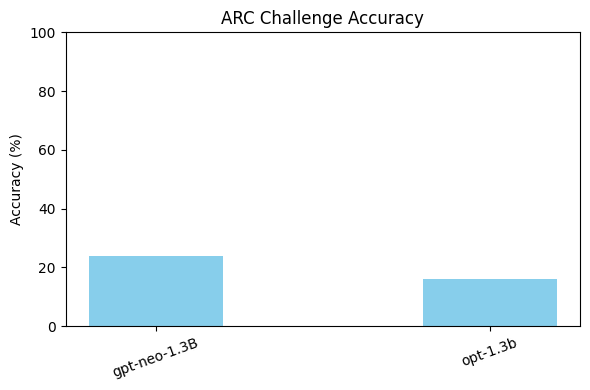

In [28]:
arc_scores = []
model_labels = []

for cfg in model_configs:
    model_name = cfg["name"]
    results = all_results[model_name]
    arc_data = results.get("results").get("arc_challenge")
    print(arc_data)
    if "acc,none" in arc_data:
        arc_scores.append(arc_data["acc,none"] * 100)
        model_labels.append(model_name)
    else:
        arc_scores.append(None)
        model_labels.append(model_name)

x = np.arange(len(model_labels))
plt.figure(figsize=(6, 4))
plt.bar(x, arc_scores, color="skyblue", width=0.4)
plt.xticks(x, model_labels, rotation=20)
plt.ylabel("Accuracy (%)")
plt.title("ARC Challenge Accuracy")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

## Visualizing: Wikitext Perplexity

{'alias': 'wikitext', 'word_perplexity,none': 15.787177467819227, 'word_perplexity_stderr,none': 'N/A', 'byte_perplexity,none': 1.6740711968414663, 'byte_perplexity_stderr,none': 'N/A', 'bits_per_byte,none': 0.7433608858009694, 'bits_per_byte_stderr,none': 'N/A'}
{'alias': 'wikitext', 'word_perplexity,none': 16.517632225769724, 'word_perplexity_stderr,none': 'N/A', 'byte_perplexity,none': 1.6882709823304534, 'byte_perplexity_stderr,none': 'N/A', 'bits_per_byte,none': 0.7555464878647614, 'bits_per_byte_stderr,none': 'N/A'}


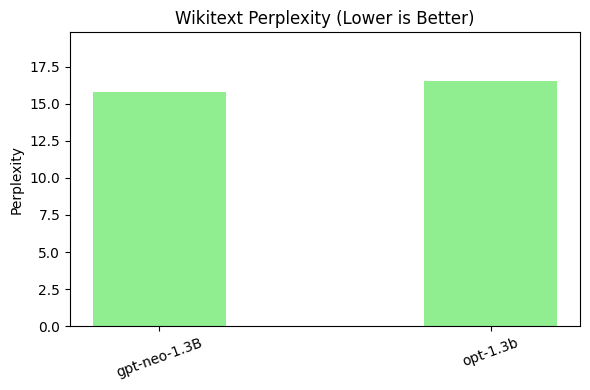

In [27]:
wiki_scores = []
wiki_labels = []

for cfg in model_configs:
    model_name = cfg["name"]
    results = all_results[model_name]
    wiki_data = results.get("results").get("wikitext")
    print(wiki_data)
    if "word_perplexity,none" in wiki_data:
        wiki_scores.append(wiki_data["word_perplexity,none"])
        wiki_labels.append(model_name)
    else:
        wiki_scores.append(None)
        wiki_labels.append(model_name)

x = np.arange(len(wiki_labels))
plt.figure(figsize=(6, 4))
plt.bar(x, wiki_scores, color="lightgreen", width=0.4)
plt.xticks(x, wiki_labels, rotation=20)
plt.ylabel("Perplexity")
plt.title("Wikitext Perplexity (Lower is Better)")
plt.ylim(0, max(wiki_scores)*1.2 if wiki_scores else 10)
plt.tight_layout()
plt.show()

## Create new evaluation tasks

Even within the same task, many works have reported numbers based on different choices of evaluation. Some report on the test sets, validation sets, or even subset of the training sets. Others have specialized prompts and verbalizers. We introduce YAMLs to allow users to easily make different variations. By leveraging the YAML configs to configure evaluations, the refactored LM-Eval takes the methods of the Task object and makes them configurable by setting the appropriate attributes in the config file. There, users can set the tasks they want by setting the name of the HF dataset (local tasks are also possible), the dataset splits used, and much more.

In [29]:
YAML_boolq_string = """
task: demo_boolq
dataset_path: super_glue
dataset_name: boolq
output_type: multiple_choice
training_split: train
validation_split: validation
doc_to_text: "{{passage}}\nQuestion: {{question}}?\nAnswer:"
doc_to_target: label
doc_to_choice: ["no", "yes"]
should_decontaminate: true
doc_to_decontamination_query: passage
metric_list:
  - metric: acc
"""
with open("boolq.yaml", "w") as f:
    f.write(YAML_boolq_string)

Now run evaluation on this task, by pointing to the config file we've just created

In [30]:
%env LOGLEVEL=DEBUG
!lm_eval \
    --model hf \
    --model_args pretrained=EleutherAI/pythia-2.8b \
    --include_path ./ \
    --tasks demo_boolq \
    --limit 10

env: LOGLEVEL=DEBUG
2025-03-07 11:21:43.855298: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741346503.883804   11151 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741346503.893109   11151 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07:11:21:50,093 INFO     [lm_eval.__main__:307] Including path: ./
2025-03-07:11:21:56,930 DEBUG    [lm_eval.tasks:523] File _evalita-mp_ner_adg.yaml in /usr/local/lib/python3.11/dist-packages/lm_eval/tasks/evalita_llm could not be loaded
2025-03-07:11:21:56,950 DEBUG    [lm_eval.tasks:523] File _evalita-mp_ner_fic.yaml in /usr/local/lib/python3.11/dist-packages/lm_eval/tasks/evalita_llm could not be loade

Often, tasks are part of a larger group used to measure different capabilities. The dynamism of the field today means new dimensions of evaluation can come about which would mix and match new and older tasks alike. In LM-Eval, We can also group tasks and call that the group name to evaluate on a set of tasks easily. In this instance, let's evaluate the tag yes_or_no_tasks which comprise of the tasks demo_boolq and demo_cola; tasks which are multiple choice tasks with options yes and no as the name suggests.

In [31]:
YAML_cola_string = """
tag: yes_or_no_tasks
task: demo_cola
dataset_path: glue
dataset_name: cola
output_type: multiple_choice
training_split: train
validation_split: validation
doc_to_text: "{{sentence}}\nQuestion: Does this sentence make sense?\nAnswer:"
doc_to_target: label
doc_to_choice: ["no", "yes"]
should_decontaminate: true
doc_to_decontamination_query: sentence
metric_list:
  - metric: acc
"""
with open("cola.yaml", "w") as f:
    f.write(YAML_cola_string)

In [32]:
%env LOGLEVEL=DEBUG
!lm_eval \
    --model hf \
    --model_args pretrained=EleutherAI/pythia-2.8b \
    --include_path ./ \
    --tasks yes_or_no_tasks \
    --limit 10 \
    --output output/yes_or_no_tasks/ \
    --log_samples

env: LOGLEVEL=DEBUG
2025-03-07 11:24:33.667788: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741346673.713278   11890 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741346673.730434   11890 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07:11:24:40,092 INFO     [lm_eval.__main__:307] Including path: ./
2025-03-07:11:24:46,002 DEBUG    [lm_eval.tasks:523] File _evalita-mp_ner_adg.yaml in /usr/local/lib/python3.11/dist-packages/lm_eval/tasks/evalita_llm could not be loaded
2025-03-07:11:24:46,022 DEBUG    [lm_eval.tasks:523] File _evalita-mp_ner_fic.yaml in /usr/local/lib/python3.11/dist-packages/lm_eval/tasks/evalita_llm could not be loade

## Edit Prompt Templates

Evaluate the specific subtask of high_school_geography from MMLU. It uses the standard prompt where the we choose the letters from the options with most likelihood as the model's prediction.

In [33]:
YAML_mmlu_geo_string = """
task: demo_mmlu_high_school_geography
dataset_path: cais/mmlu
dataset_name: high_school_geography
description: "The following are multiple choice questions (with answers) about high school geography.\n\n"
test_split: test
fewshot_split: dev
fewshot_config:
  sampler: first_n
output_type: multiple_choice
doc_to_text: "{{question.strip()}}\nA. {{choices[0]}}\nB. {{choices[1]}}\nC. {{choices[2]}}\nD. {{choices[3]}}\nAnswer:"
doc_to_choice: ["A", "B", "C", "D"]
doc_to_target: answer
metric_list:
  - metric: acc
    aggregation: mean
    higher_is_better: true
  - metric: acc_norm
    aggregation: mean
    higher_is_better: true
"""
with open("mmlu_high_school_geography.yaml", "w") as f:
    f.write(YAML_mmlu_geo_string)

In [34]:
%env LOGLEVEL=DEBUG
!lm_eval \
    --model hf \
    --model_args pretrained=EleutherAI/pythia-2.8b \
    --include_path ./ \
    --tasks demo_mmlu_high_school_geography \
    --limit 10 \
    --output output/mmlu_high_school_geography/ \
    --log_samples

env: LOGLEVEL=DEBUG
2025-03-07 11:26:03.741988: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741346763.771555   12326 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741346763.781290   12326 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07:11:26:09,615 INFO     [lm_eval.__main__:307] Including path: ./
2025-03-07:11:26:16,386 DEBUG    [lm_eval.tasks:523] File _evalita-mp_ner_adg.yaml in /usr/local/lib/python3.11/dist-packages/lm_eval/tasks/evalita_llm could not be loaded
2025-03-07:11:26:16,406 DEBUG    [lm_eval.tasks:523] File _evalita-mp_ner_fic.yaml in /usr/local/lib/python3.11/dist-packages/lm_eval/tasks/evalita_llm could not be loade

We could also evaluate this task in a different way. For example, instead of observing the loglikelihood of the letters, we can instead evaluate on the choices themselves as the continuation. This is done by simply changing doc_to_choice from a list of letters to the corresponding choices field from the HF dataset. We write "{{choices}}" so that the string field is interpreted as jinja string that acquires the list from the HF dataset directly.

Since the only parameter that needs to be altered is `doc_to_choice`, we can just import the template above via the include option.

In [35]:
YAML_mmlu_geo_string = """
include: mmlu_high_school_geography.yaml
task: demo_mmlu_high_school_geography_continuation
doc_to_text: "{{question.strip()}}\nA. {{choices[0]}}\nB. {{choices[1]}}\nC. {{choices[2]}}\nD. {{choices[3]}}\nAnswer:"
doc_to_choice: "{{choices}}"
"""
with open("mmlu_high_school_geography_continuation.yaml", "w") as f:
    f.write(YAML_mmlu_geo_string)

In [36]:
%env LOGLEVEL=DEBUG
!lm_eval \
    --model hf \
    --model_args pretrained=EleutherAI/pythia-2.8b \
    --include_path ./ \
    --tasks demo_mmlu_high_school_geography_continuation \
    --limit 10 \
    --output output/mmlu_high_school_geography_continuation/ \
    --log_samples

env: LOGLEVEL=DEBUG
2025-03-07 11:40:39.461901: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741347639.500567   16039 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741347639.511319   16039 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07:11:40:45,719 INFO     [lm_eval.__main__:307] Including path: ./
2025-03-07:11:40:51,647 DEBUG    [lm_eval.tasks:523] File _evalita-mp_ner_adg.yaml in /usr/local/lib/python3.11/dist-packages/lm_eval/tasks/evalita_llm could not be loaded
2025-03-07:11:40:51,668 DEBUG    [lm_eval.tasks:523] File _evalita-mp_ner_fic.yaml in /usr/local/lib/python3.11/dist-packages/lm_eval/tasks/evalita_llm could not be loade